In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/ASUS/Machine_Learning/100_Days_Of _Machine_Learning/Feature_Engineering/Datasets/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [3]:
# Disadvantages
# Change the distribution shape
# Create outliers
# Changes in Corr

# Mean/Median Imputation
*Used when data is missing completely ar random

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [7]:
X = df.drop(columns=['Survived'])
y = df.Survived

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [10]:
mean_age = df.Age.mean()
median_age = df.Age.median()

mean_fare = df.Fare.mean()
median_fare = df.Fare.median()

In [11]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [13]:
X_train

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
30,40.0,27.7208,0,40.0,40.000000,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.000000,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.000000,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.000000,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.000000,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.0,30.000000,8.6625,8.6625
584,NaN,8.7125,0,28.0,29.699118,8.7125,8.7125
493,71.0,49.5042,0,71.0,71.000000,49.5042,49.5042
527,NaN,221.7792,0,28.0,29.699118,221.7792,221.7792


In [14]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  162.33852985330878
Age Variance after mean imputation:  161.813866455868
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2340.098181126126
Fare Variance after mean imputation:  2324.2440261087


**So, aplying mean/meadian on fare column is appropriate**

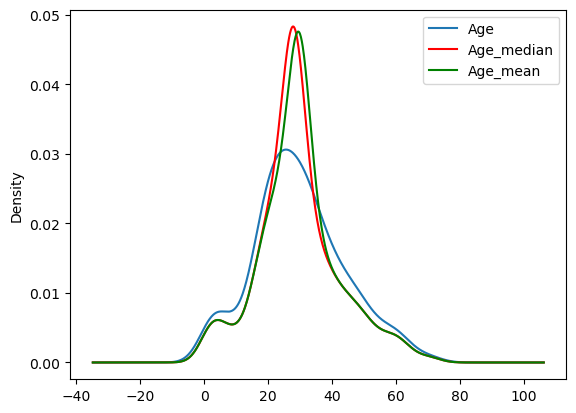

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)


X_train['Age'].plot(kind='kde', ax=ax)
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()

<Axes: ylabel='Density'>

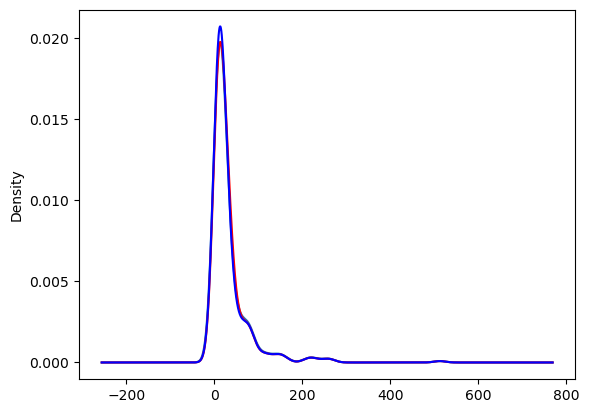

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train.Fare.plot(kind = 'kde',ax = ax)
X_train.Fare_mean.plot(kind = 'kde',ax = ax,color = 'red')
X_train.Fare_median.plot(kind = 'kde',ax = ax,color = 'blue')

In [21]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858451,66.631558
Fare,70.719262,2448.197914,17.258917,59.661820,55.800924,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.088278,-5.143296,16.476326,16.386748
Age_median,204.349513,59.661820,-5.088278,162.338530,161.838181,55.142638,56.613065
Age_mean,204.349513,55.800924,-5.143296,161.838181,161.813866,51.541608,52.948856
Fare_median,64.858451,2448.197914,16.476326,55.142638,51.541608,2340.098181,2324.533881
Fare_mean,66.631558,2448.197914,16.386748,56.613065,52.948856,2324.533881,2324.244026


In [22]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087355,0.090109
Fare,0.092644,1.000000,0.208268,0.094361,0.088382,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.241469,-0.244475,0.205942,0.205520
Age_median,1.000000,0.094361,-0.241469,1.000000,0.998533,0.089466,0.092165
Age_mean,1.000000,0.088382,-0.244475,0.998533,1.000000,0.083759,0.086339
Fare_median,0.087355,1.000000,0.205942,0.089466,0.083759,1.000000,0.996731
Fare_mean,0.090109,1.000000,0.205520,0.092165,0.086339,0.996731,1.000000


<Axes: >

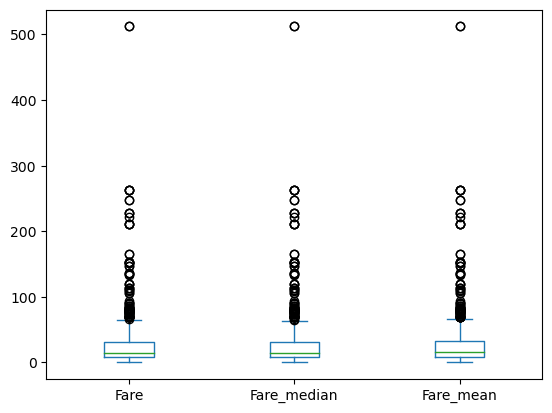

In [23]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].plot(kind='box')

<Axes: >

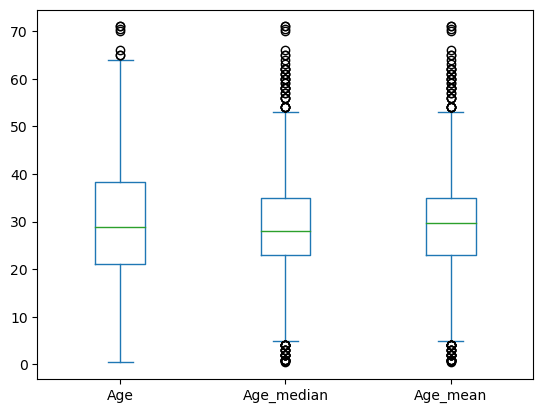

In [24]:
X_train[['Age', 'Age_median', 'Age_mean']].plot(kind = 'box')

# Using Sklearn

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [36]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [37]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [38]:
X_train = trf.fit_transform(X_train)

In [39]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

In [40]:
X_test = trf.transform(X_test)

In [41]:
X_test

array([[ 42.        ,  26.2875    ,   0.        ],
       [ 21.        ,   8.05      ,   0.        ],
       [ 24.        ,  65.        ,   3.        ],
       [ 28.        ,  56.4958    ,   0.        ],
       [ 17.        ,   7.925     ,   6.        ],
       [ 30.        ,   7.8958    ,   0.        ],
       [ 80.        ,  30.        ,   0.        ],
       [ 25.        ,   7.25      ,   0.        ],
       [ 50.        , 133.65      ,   2.        ],
       [ 25.        ,  26.        ,   1.        ],
       [ 35.        ,  26.        ,   0.        ],
       [ 35.        ,  90.        ,   1.        ],
       [ 55.        ,  16.        ,   0.        ],
       [ 28.75      ,  56.4958    ,   0.        ],
       [ 28.75      ,  56.4958    ,   0.        ],
       [ 19.        ,   7.8542    ,   1.        ],
       [ 28.75      ,  15.2458    ,   2.        ],
       [ 49.        ,   0.        ,   0.        ],
       [ 18.        ,  32.61759689,   1.        ],
       [ 65.        ,   7.75   

# Arbitary value Imputation
*Used when data is not missing completely ar random

In [42]:
X1 = df.drop(columns=['Survived'])
y1 = df['Survived']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=2)

In [44]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [45]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.3495133904614
Age Variance after 99 wala imputation:  951.7275570187172
Age Variance after -1 wala imputation:  318.0896202624484
Original Fare variable variance:  2448.197913706318
Fare Variance after 999 wala imputation:  47219.20265217623
Fare Variance after -1 wala imputation:  2378.5676784883503


[]

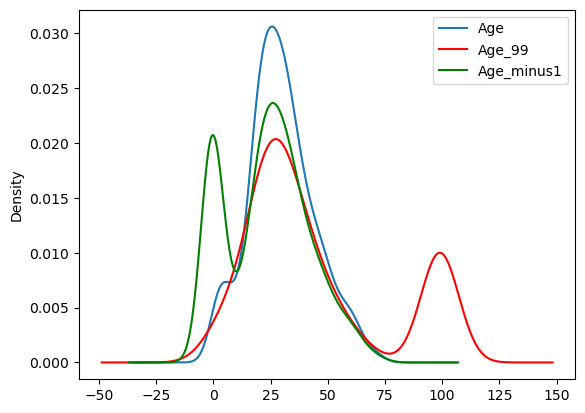

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)


X_train['Age'].plot(kind='kde', ax=ax)
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.plot()

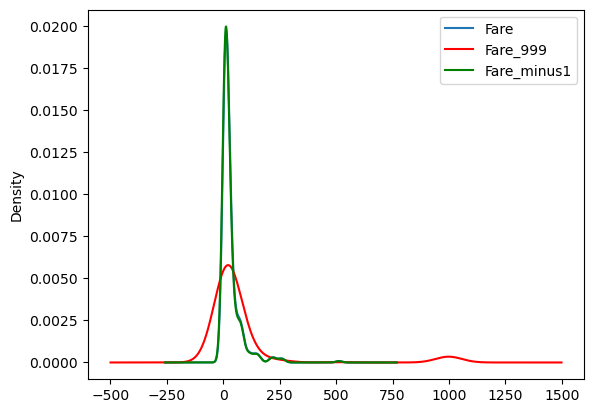

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde', ax=ax)
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()

In [50]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [51]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


**Using Sklearn**

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=2)

In [60]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [61]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [62]:
trf.fit_transform(X_train)

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

In [63]:
X_test = trf.transform(X_test)

In [64]:
X_test

array([[4.200000e+01, 2.628750e+01, 0.000000e+00],
       [2.100000e+01, 8.050000e+00, 0.000000e+00],
       [2.400000e+01, 6.500000e+01, 3.000000e+00],
       [2.800000e+01, 5.649580e+01, 0.000000e+00],
       [1.700000e+01, 7.925000e+00, 6.000000e+00],
       [3.000000e+01, 7.895800e+00, 0.000000e+00],
       [8.000000e+01, 3.000000e+01, 0.000000e+00],
       [2.500000e+01, 7.250000e+00, 0.000000e+00],
       [5.000000e+01, 1.336500e+02, 2.000000e+00],
       [2.500000e+01, 2.600000e+01, 1.000000e+00],
       [3.500000e+01, 2.600000e+01, 0.000000e+00],
       [3.500000e+01, 9.000000e+01, 1.000000e+00],
       [5.500000e+01, 1.600000e+01, 0.000000e+00],
       [9.900000e+01, 5.649580e+01, 0.000000e+00],
       [9.900000e+01, 5.649580e+01, 0.000000e+00],
       [1.900000e+01, 7.854200e+00, 1.000000e+00],
       [9.900000e+01, 1.524580e+01, 2.000000e+00],
       [4.900000e+01, 0.000000e+00, 0.000000e+00],
       [1.800000e+01, 9.990000e+02, 1.000000e+00],
       [6.500000e+01, 7.750000e